# Análise fatorial:
* Livro: https://repositorio.enap.gov.br/bitstream/1/4790/1/Livro%20An%c3%a1lise%20Fatorial.pdf
* Como interpretar os resultados: https://support.minitab.com/en-us/minitab/21/help-and-how-to/statistical-modeling/multivariate/how-to/factor-analysis/interpret-the-results/key-results/
* Documentação do pacoe, é possível ver quais funções de análise fatorial o pacote oferece: https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html

In [1]:
from factor_analyzer import FactorAnalyzer
import pandas as pd
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados=pd.read_csv("Dados.csv")

In [3]:
### Deixando apenas as variáveis, retirando o nome e código dos municipios
dados_municipios=dados[['cod_municipio', 'nome_municipio']]
dados=dados.drop(['cod_municipio', 'nome_municipio'], axis=1)

A escala dos dados pode influenciar nos pesos de retorno da análise fatorial. 
Todos os dados então em mesma escala (percentual), variando de 0-100%. As porcentagens tem distribuição distintas, dependendo das variáveis.

Faço a transformação para variar de 0-1

In [4]:
for col in dados.columns:
    dados[col]/=100

**Autovalores - Variância inicial - Eigin values**  

In [5]:
fa = FactorAnalyzer(rotation=None, n_factors=len(dados.columns))
fa.fit(dados)

FactorAnalyzer(n_factors=24, rotation=None, rotation_kwargs={})

In [6]:
v, prop_v, cum_v = fa.get_factor_variance()
variancia=pd.DataFrame(v)
variancia.rename(columns={0: 'variância total'}, inplace=True)
variancia['variância proporcional']=prop_v
variancia['variância acumulada']=cum_v

lines=['fator_'+str(i) for i in range(len(dados.columns))]
variancia['fatores']=lines
variancia.set_index('fatores', inplace=True)

In [7]:
print("Initial Eigin Values")
variancia

Initial Eigin Values


,variância total,variância proporcional,variância acumulada
fatores,,,
fator_0,3.610039,0.150418,0.150418
fator_1,2.073983,0.086416,0.236834
fator_2,1.540940,0.064206,0.301040
fator_3,1.408816,0.058701,0.359741
fator_4,1.118416,0.046601,0.406341
fator_5,0.856968,0.035707,0.442048
fator_6,0.804207,0.033509,0.475557
fator_7,0.705583,0.029399,0.504956
fator_8,0.688328,0.028680,0.533637


### MSA

Sobre MSA, precisamos ler mais para confirmar. Pelo que entendi, a métrica KMO + Bartlett já são o MSA(Measure of Sampling Adequacy (MSA).

https://www.kindsonthegenius.com/basics-of-factor-analysis-for-data-scientists/

A AF só faz sentido se as variáveis analisadas forem altamente correlacionadas entre si

Testes para verificar correlações:
* Teste de Bartlett deve ser estatisticamente significante (p <0,05)
* Teste de Kaiser-Meyer-Olkim (KMO): verifica a adequabilidade da amostra. Variáveis <0.5 são inaceitáveis


In [8]:
chi_square_value,p_value=calculate_bartlett_sphericity(dados)
print("Bartlett’s Test")
print(chi_square_value)
print('p: ', p_value)

Bartlett’s Test
2822.617689250583
p:  0.0


In [9]:
kmo_by_var,kmo_overall=calculate_kmo(dados)
print("KMO Test")
print('KMO - GERAL: ', kmo_overall)

KMO Test
KMO - GERAL:  0.6291716796095596


/home/jacqueline/miniconda3/lib/python3.8/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [10]:
kmo=pd.DataFrame(kmo_by_var)
kmo['variável']=dados.columns
kmo.set_index('variável', inplace=True)
kmo.rename(columns={0: 'KMO'}, inplace=True)
print('KMO para cada variável')
kmo

KMO para cada variável


,KMO
variável,
Acesso à escola,0.693609
Alfabetização na idade devida,0.677024
Orientação técnica,0.668500
Demais informações técnicas,0.770122
Participação em grupos da sociedade civil,0.667371
Acesso a crédito e financiamento,0.693138
Acesso a outros programas do governo,0.596346
Participação nos programas de pagamento por serviços ambientais,0.519753
Participação no Programa Nacional de Habitação Rural,0.451716


In [11]:
#filtrando variáveis com <5

kmo_5= [i for i, k in zip(
    range(len(kmo_by_var)), 
    kmo_by_var) if k<0.5]
cols_kmo_5=[dados.columns[i] for i in kmo_5]

print('KMO < 5: ', cols_kmo_5)

dados=dados.drop(cols_kmo_5, axis=1)

KMO < 5:  ['Participação no Programa Nacional de Habitação Rural', 'Exposição a doenças advindas do esgoto a céu aberto', 'Iluminação pública', 'Pavimentação']


Escolha de número de fatores, 3 métodos que devem ser usados, combinados:

* **Método autovalor**: reter apenas fatores com autovalores grandes 
    * "O autovalor (eigenvalue) pode ser definido da seguinte forma: o eigenvalue de um dado fator mede a variância em todas as variáveis que é devida ao fator. A razão de eigenvalues é a razão da **importância explicativa dos fatores em relação às variáveis**. Se um fator tem um eigenvalue baixo, ele contribui pouco para a explicação das variâncias nas variáveis e pode ser ignorado.
    * Critério Kaiser: manter eigenvalues >1 (quando entre 20-50 variáveis)
* **Diagrama de declividade** (Scree test) -- a ideia é encontrar o ponto de descida rapida x quase estabilidade 
* **Porcentagem de variância acumulada** (sugestão de 60%)

In [12]:
fa = FactorAnalyzer(rotation=None, n_factors=len(dados.columns))
fa.fit(dados)

FactorAnalyzer(n_factors=20, rotation=None, rotation_kwargs={})

**Método autovalor + diagrama de declividade**

Método Autovalor - Eigenvalue

[3.8111843  2.42704281 1.61913245 1.43961176 1.20658731 1.15209946
 1.08582852 0.99664418 0.9737075  0.86588652 0.72486487 0.64972638
 0.59868308 0.54675366 0.50336426 0.410435   0.35239685 0.30544223
 0.22176224 0.10884663]

Número de fatores sugeridos (>1):  7




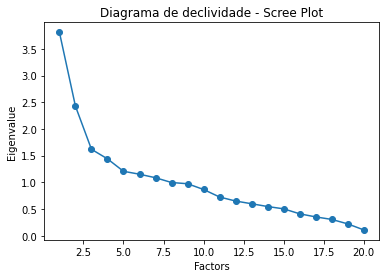

In [13]:
ev, v = fa.get_eigenvalues()
print("Método Autovalor - Eigenvalue\n")
print(ev)
print("\nNúmero de fatores sugeridos (>1): ", len([each for each in ev if each>=1.0]))

print()
print()
plt.scatter(range(1,dados.shape[1]+1),ev)
plt.plot(range(1,dados.shape[1]+1),ev)
plt.title('Diagrama de declividade - Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
#plt.grid()
plt.show()

In [14]:
print("Método Variância Acumulada\n")
v, prop_v, cum_v=fa.get_factor_variance()
print(cum_v)

print('Número de fatores sugeridos(>60%): ', len([each for each in cum_v if each>=0.6]))

Método Variância Acumulada

[0.17898312 0.28173689 0.35253638 0.4075901  0.4487089  0.48679057
 0.52012592 0.53953529 0.55673082 0.57301779 0.58443692 0.5934076
 0.59960291 0.60541736 0.60835896 0.61007174 0.61111765 0.61156207
 0.61167354 0.61167354]
Número de fatores sugeridos(>60%):  7


In [15]:
v, prop_v, cum_v=fa.get_factor_variance()

variancia=pd.DataFrame(v)
variancia.rename(columns={0: 'variância total'}, inplace=True)
variancia['variância proporcional']=prop_v
variancia['variância acumulada']=cum_v

lines=['fator_'+str(i) for i in range(len(dados.columns))]
variancia['fatores']=lines
variancia.set_index('fatores', inplace=True)

In [16]:
print("variancia ou Extraction Sums of Squared Loadings ==> após corte de variáveis")
variancia

variancia ou Extraction Sums of Squared Loadings ==> após corte de variáveis


,variância total,variância proporcional,variância acumulada
fatores,,,
fator_0,3.579662,0.178983,0.178983
fator_1,2.055075,0.102754,0.281737
fator_2,1.415990,0.070799,0.352536
fator_3,1.101074,0.055054,0.407590
fator_4,0.822376,0.041119,0.448709
fator_5,0.761633,0.038082,0.486791
fator_6,0.666707,0.033335,0.520126
fator_7,0.388187,0.019409,0.539535
fator_8,0.343911,0.017196,0.556731


In [17]:
rotation=['varimax', 'promax', 'oblimin', 'oblimax', 'quartimin', 'quartimax', 'equamax']

## Análise fatorial
* numero de fatores = 7

In [18]:
N=7

In [19]:
fa = FactorAnalyzer(rotation=None, n_factors=N, method='ml')
fa.fit(dados)

v, prop_v, cum_v=fa.get_factor_variance()

variancia=pd.DataFrame(v)
variancia.rename(columns={0: 'variância total'}, inplace=True)
variancia['variância proporcional']=prop_v
variancia['variância acumulada']=cum_v

lines=['fator_'+str(i) for i in range(len(v))]
variancia['fatores']=lines
variancia.set_index('fatores', inplace=True)

In [20]:
print("variancia ou Extraction Sums of Squared Loadings ==> para {} fatores".format(N))
variancia

variancia ou Extraction Sums of Squared Loadings ==> para 7 fatores


,variância total,variância proporcional,variância acumulada
fatores,,,
fator_0,2.704545,0.135227,0.135227
fator_1,1.960175,0.098009,0.233236
fator_2,1.735094,0.086755,0.319991
fator_3,1.066776,0.053339,0.373330
fator_4,0.959205,0.047960,0.421290
fator_5,0.804255,0.040213,0.461502
fator_6,0.539657,0.026983,0.488485


In [21]:
print("Printando cargas fatoriais")
cargas=pd.DataFrame(fa.loadings_)
cargas['variável']=dados.columns
cargas.set_index(['variável'], inplace=True)
cargas

Printando cargas fatoriais


,0,1,2,3,4,5,6
variável,,,,,,,
Acesso à escola,0.336674,0.619776,0.373535,-0.038683,-0.160093,-0.089924,-0.050864
Alfabetização na idade devida,0.367663,0.792009,0.252200,-0.073678,-0.213236,0.058925,0.019684
Orientação técnica,0.185237,0.328571,-0.097403,-0.064761,0.337046,-0.131609,0.461431
Demais informações técnicas,0.189011,0.156625,0.050381,0.082195,0.088616,0.025218,0.072799
Participação em grupos da sociedade civil,-0.034563,-0.134360,0.522321,-0.053311,0.137957,0.106463,0.328069
Acesso a crédito e financiamento,-0.109543,-0.119126,0.332173,-0.052274,0.113534,0.240895,0.200416
Acesso a outros programas do governo,-0.238632,-0.577344,0.633107,0.090649,-0.161553,-0.069618,0.069708
Participação nos programas de pagamento por serviços ambientais,-0.018423,-0.067914,-0.027297,0.014190,-0.126535,0.005999,0.114422
Acesso a aposentadoria ou pensão,-0.217312,-0.302583,0.312808,-0.050869,0.254229,0.485332,-0.030304


Mesmos dados, mostrados em mapa de calor


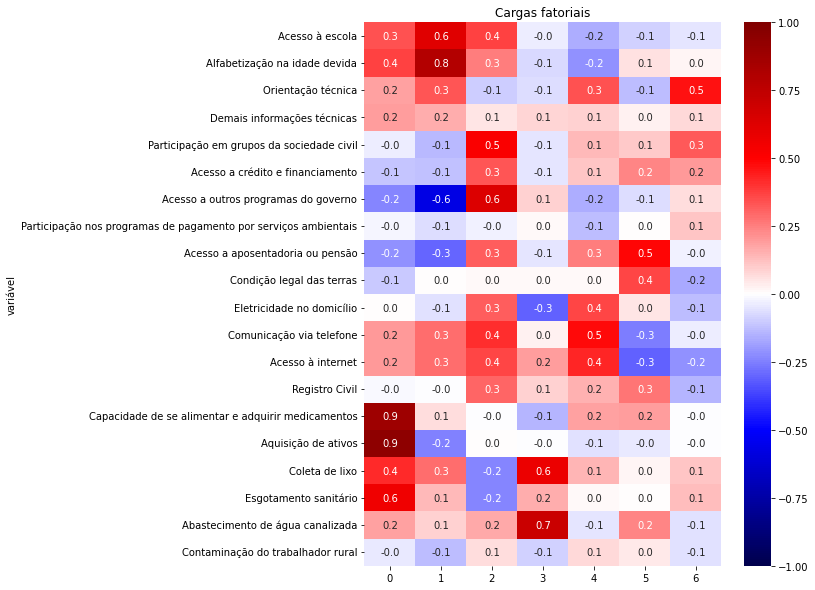

In [22]:
print('Mesmos dados, mostrados em mapa de calor')
fig, ax = plt.subplots(figsize=(8,10))
sns.heatmap(cargas, annot=True, fmt=".1f", cmap='seismic', vmin=-1, vmax=1, ax=ax)
plt.title('Cargas fatoriais')
plt.show()

**Usando quadrado das cargas** -- Não parece melhor de visualizar nao, pois as cargas pequenas ficam menores ainda

Cargas^2, mostrados em mapa de calor


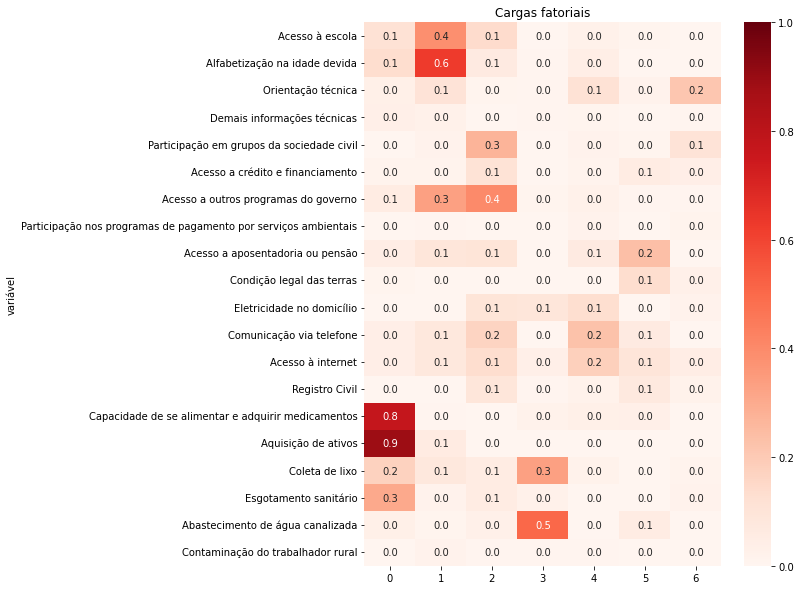

In [23]:
print('Cargas^2, mostrados em mapa de calor')
fig, ax = plt.subplots(figsize=(8,10))
sns.heatmap(cargas**2, annot=True, fmt=".1f", cmap='Reds', vmin=0, vmax=1, ax=ax)
plt.title('Cargas fatoriais')
plt.show()

#### Executando rotações 

É um processamento nos dados visando melhor interpretabilidade nos dados. Deve-se escolher a melhor rotação.

Printando cargas fatoriais


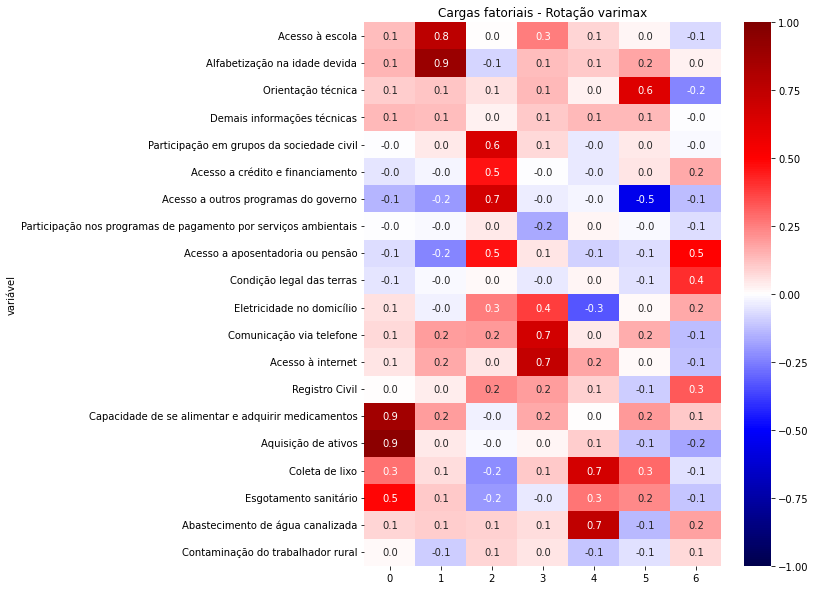

Variância ou Rotation Sums of Squared Loadings para rotação varimax
   variância total  variância proporcional  variância acumulada
0         2.076879                0.103844             0.103844
1         1.646843                0.082342             0.186186
2         1.587764                0.079388             0.265574
3         1.365748                0.068287             0.333862
4         1.292812                0.064641             0.398502
5         1.012083                0.050604             0.449106
6         0.787577                0.039379             0.488485

Comunalidade
                                                    comunalidade
variable                                                        
Acesso à escola                                         0.674800
Alfabetização na idade devida                           0.880817
Orientação técnica                                      0.499793
Demais informações técnicas                             0.083339
Participação em 

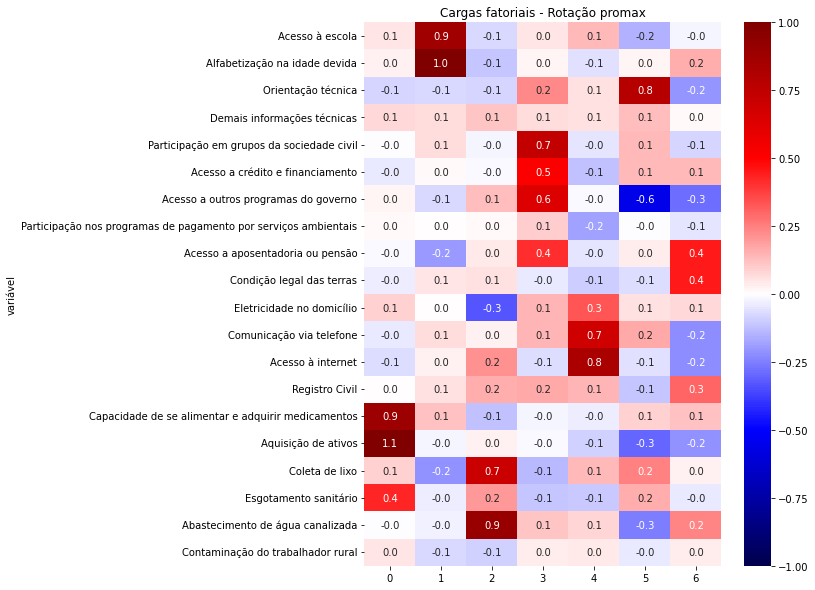

Variância ou Rotation Sums of Squared Loadings para rotação promax
   variância total  variância proporcional  variância acumulada
0         2.141141                0.107057             0.107057
1         1.916032                0.095802             0.202859
2         1.616153                0.080808             0.283666
3         1.568790                0.078439             0.362106
4         1.438940                0.071947             0.434053
5         1.310210                0.065511             0.499563
6         0.893495                0.044675             0.544238

Comunalidade
                                                    comunalidade
variable                                                        
Acesso à escola                                         0.809998
Alfabetização na idade devida                           1.062036
Orientação técnica                                      0.732979
Demais informações técnicas                             0.046262
Participação em g

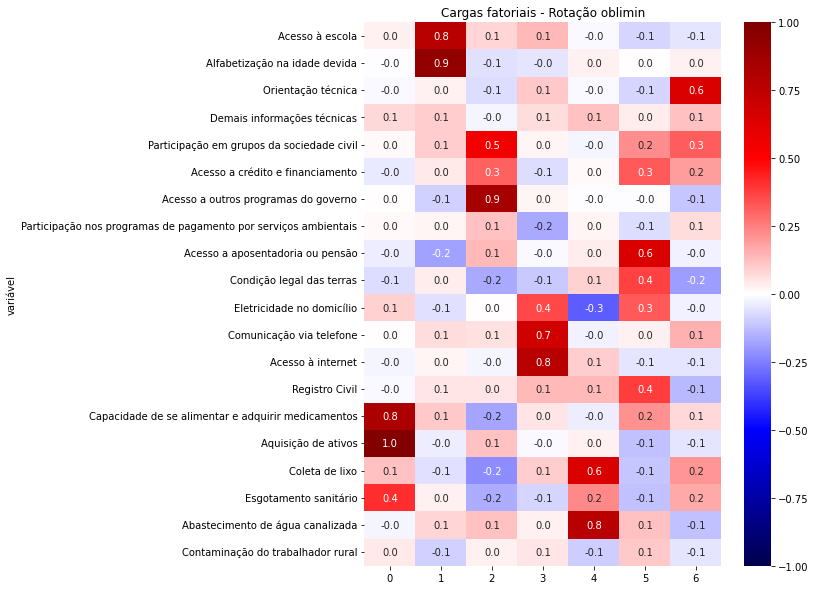

Variância ou Rotation Sums of Squared Loadings para rotação oblimin
   variância total  variância proporcional  variância acumulada
0         1.868697                0.093435             0.093435
1         1.572891                0.078645             0.172079
2         1.333554                0.066678             0.238757
3         1.316689                0.065834             0.304592
4         1.238598                0.061930             0.366521
5         1.090857                0.054543             0.421064
6         0.762665                0.038133             0.459198

Comunalidade
                                                    comunalidade
variable                                                        
Acesso à escola                                         0.639063
Alfabetização na idade devida                           0.867053
Orientação técnica                                      0.439929
Demais informações técnicas                             0.049119
Participação em 

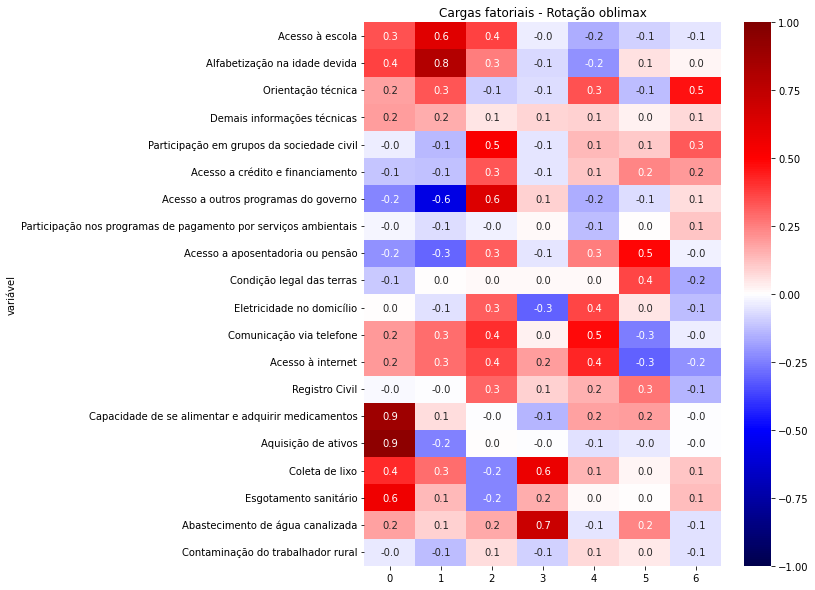

Variância ou Rotation Sums of Squared Loadings para rotação oblimax
   variância total  variância proporcional  variância acumulada
0         2.703545                0.135177             0.135177
1         1.960850                0.098042             0.233220
2         1.735064                0.086753             0.319973
3         1.066998                0.053350             0.373323
4         0.959263                0.047963             0.421286
5         0.804320                0.040216             0.461502
6         0.539665                0.026983             0.488485

Comunalidade
                                                    comunalidade
variable                                                        
Acesso à escola                                         0.674800
Alfabetização na idade devida                           0.880817
Orientação técnica                                      0.499793
Demais informações técnicas                             0.083339
Participação em 

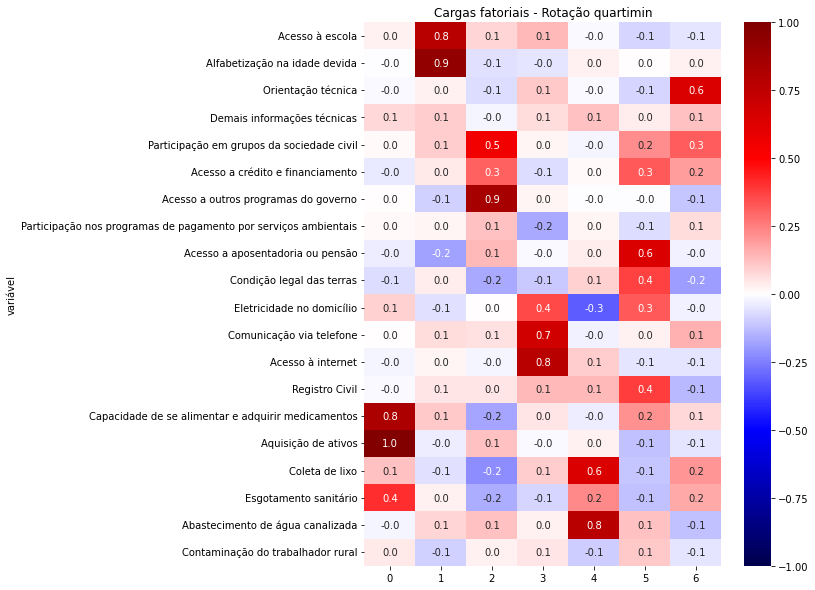

Variância ou Rotation Sums of Squared Loadings para rotação quartimin
   variância total  variância proporcional  variância acumulada
0         1.868697                0.093435             0.093435
1         1.572891                0.078645             0.172079
2         1.333554                0.066678             0.238757
3         1.316689                0.065834             0.304592
4         1.238598                0.061930             0.366521
5         1.090857                0.054543             0.421064
6         0.762665                0.038133             0.459198

Comunalidade
                                                    comunalidade
variable                                                        
Acesso à escola                                         0.639063
Alfabetização na idade devida                           0.867053
Orientação técnica                                      0.439929
Demais informações técnicas                             0.049119
Participação e

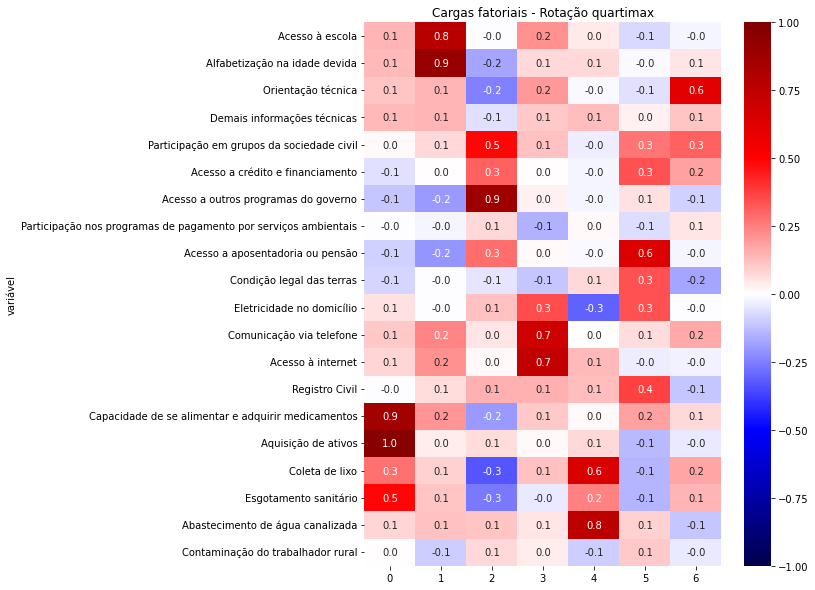

Variância ou Rotation Sums of Squared Loadings para rotação quartimax
   variância total  variância proporcional  variância acumulada
0         2.105815                0.105291             0.105291
1         1.744392                0.087220             0.192510
2         1.567564                0.078378             0.270889
3         1.345299                0.067265             0.338154
4         1.234850                0.061742             0.399896
5         1.100939                0.055047             0.454943
6         0.670848                0.033542             0.488485

Comunalidade
                                                    comunalidade
variable                                                        
Acesso à escola                                         0.674800
Alfabetização na idade devida                           0.880817
Orientação técnica                                      0.499793
Demais informações técnicas                             0.083339
Participação e

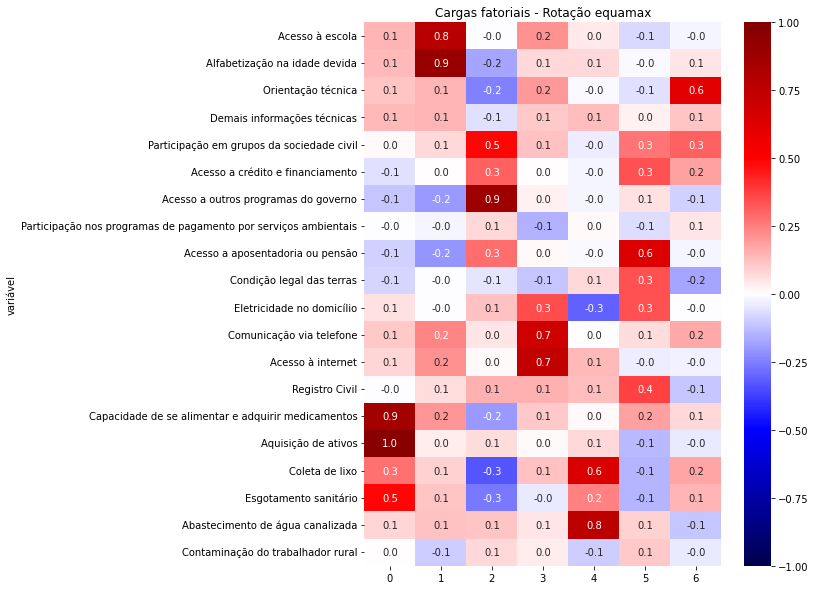

Variância ou Rotation Sums of Squared Loadings para rotação equamax
   variância total  variância proporcional  variância acumulada
0         2.105815                0.105291             0.105291
1         1.744392                0.087220             0.192510
2         1.567564                0.078378             0.270889
3         1.345299                0.067265             0.338154
4         1.234850                0.061742             0.399896
5         1.100939                0.055047             0.454943
6         0.670848                0.033542             0.488485

Comunalidade
                                                    comunalidade
variable                                                        
Acesso à escola                                         0.674800
Alfabetização na idade devida                           0.880817
Orientação técnica                                      0.499793
Demais informações técnicas                             0.083339
Participação em 

In [24]:
print("Printando cargas fatoriais")
var_rot={}
cargas_rot={}

for rot in rotation:
    fa = FactorAnalyzer(rotation=rot, n_factors=N, method='ml')
    fa.fit(dados)
    
    cargas=pd.DataFrame(fa.loadings_)
    cargas['variável']=dados.columns
    cargas.set_index(['variável'], inplace=True)
    cargas_rot[rot]=cargas

    fig, ax = plt.subplots(figsize=(8,10))
    sns.heatmap(cargas, annot=True, fmt=".1f", cmap='seismic', vmin=-1, vmax=1, ax=ax)
    plt.title('Cargas fatoriais - Rotação '+rot)
    plt.show()    


    # variancia dos fatores
    var_rot[rot]=fa.get_factor_variance()

    print("Variância ou Rotation Sums of Squared Loadings para rotação "+ rot)
    variancia=pd.DataFrame(var_rot[rot][0])
    variancia.rename(columns={0: 'variância total'}, inplace=True)
    variancia['variância proporcional']=var_rot[rot][1]
    variancia['variância acumulada']=var_rot[rot][2]
    print(variancia)
    print()

    print('Comunalidade')
    comm=pd.DataFrame(fa.get_communalities())
    comm.rename(columns={0: 'comunalidade'}, inplace=True)
    comm['variable']=dados.columns
    comm.set_index('variable', inplace=True)
    print(comm)
    print()
    print()

**Comunalidade**
Quanto da variação de cada variável é explicada pelo modelo fatorial. 

Gostei dessa explicação: https://online.stat.psu.edu/stat505/lesson/12/12.5

What are Communalities? 

Commonalities are the **sum of the squared loadings** for each variable (não para os fatores). It represents the common variance. It ranges from 0-1 and value close to 1 represents more variance.
(https://www.datacamp.com/tutorial/introduction-factor-analysis)

**É preciso estudar melhor o que são cada métricas e eu posso refazer... O pacote do python acaba usando nomes diferentes das referencias, então as vezes é dificil mapear**

## VISUALIZAÇÃO DAS CARGAS PARA MODELO ESCOLHIDO 
Rotação equamax

In [25]:
N=7
rot='equamax'

print("Printando cargas fatoriais")
fa = FactorAnalyzer(rotation=rot, n_factors=N, method='ml')
fa.fit(dados)

cargas=pd.DataFrame(fa.loadings_)
cargas['variável']=dados.columns
cargas.set_index(['variável'], inplace=True)

cargas.columns=['Renda', 'Educação', 'Programas do governo e os grupos da sociedade civil', 'Comunicação digital', 
                'Saneamento básico', 'Estruturas sociais e institucionais', 'Orientação técnica']
cargas

Printando cargas fatoriais


,Renda,Educação,Programas do governo e os grupos da sociedade civil,Comunicação digital,Saneamento básico,Estruturas sociais e institucionais,Orientação técnica
variável,,,,,,,
Acesso à escola,0.141411,0.774136,-0.005688,0.217169,0.045926,-0.076899,-0.017296
Alfabetização na idade devida,0.140597,0.902927,-0.177992,0.074195,0.075435,-0.012846,0.052253
Orientação técnica,0.110388,0.146974,-0.248204,0.195414,-0.014690,-0.057044,0.602282
Demais informações técnicas,0.135624,0.145930,-0.060541,0.102113,0.125471,0.029562,0.113758
Participação em grupos da sociedade civil,0.008289,0.074483,0.490568,0.119414,-0.038133,0.272171,0.311191
Acesso a crédito e financiamento,-0.056142,0.006237,0.308480,0.002791,-0.017929,0.342869,0.184689
Acesso a outros programas do governo,-0.114493,-0.202414,0.876113,0.024340,-0.021555,0.060468,-0.093548
Participação nos programas de pagamento por serviços ambientais,-0.004445,-0.021149,0.072659,-0.148833,0.015178,-0.062906,0.054335
Acesso a aposentadoria ou pensão,-0.092126,-0.210737,0.283940,0.010076,-0.010122,0.637271,-0.021860


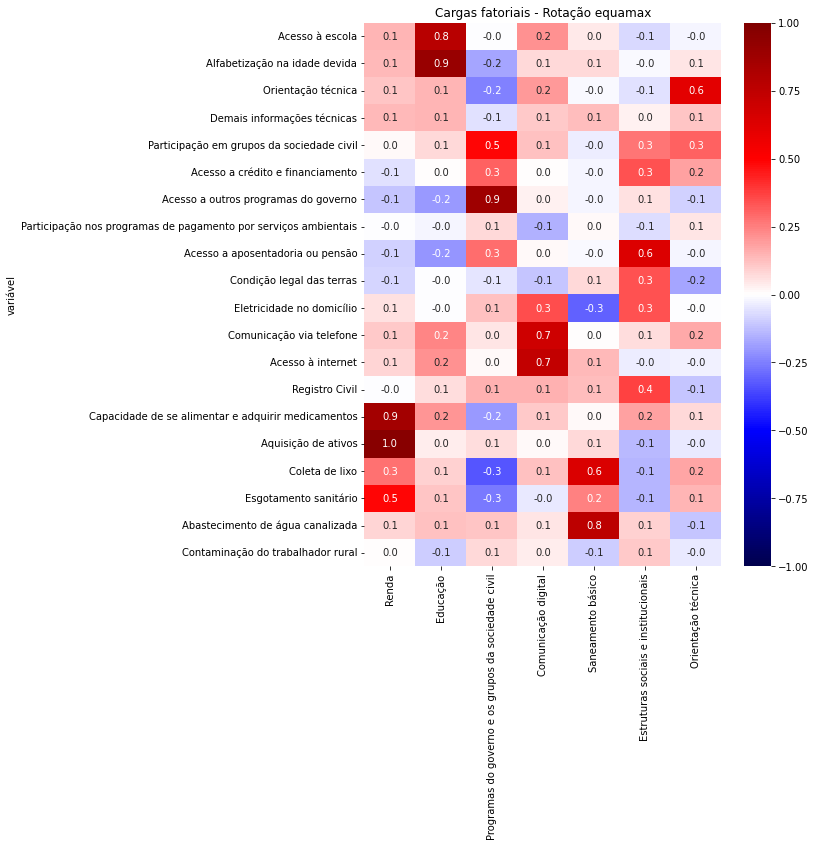

In [26]:
fig, ax = plt.subplots(figsize=(8,10))
sns.heatmap(cargas, annot=True, fmt=".1f", cmap='seismic', vmin=-1, vmax=1, ax=ax)
plt.title('Cargas fatoriais - Rotação '+rot)
plt.show()

In [27]:
# carga por municipio
dados_por_mun=pd.read_csv('Dados.csv')

carga_mun=dados.dot(cargas)
carga_mun['cod_municipio']=dados_por_mun['cod_municipio']
carga_mun['nome_municipio']=dados_por_mun['nome_municipio']
carga_mun.set_index(['cod_municipio', 'nome_municipio'], inplace=True)
carga_mun

,,Renda,Educação,Programas do governo e os grupos da sociedade civil,Comunicação digital,Saneamento básico,Estruturas sociais e institucionais,Orientação técnica
cod_municipio,nome_municipio,,,,,,,
2900108,Abaíra (BA),2.146413,0.824340,0.714335,1.338589,0.962007,0.635029,1.320794
2900207,Abaré (BA),2.273601,1.038548,0.643345,1.629238,1.297079,0.953285,1.310424
2900306,Acajutiba (BA),2.391797,1.084545,0.949254,1.516741,1.499668,0.896317,1.307264
2900355,Adustina (BA),2.354884,1.173277,0.871815,1.467241,1.426014,0.891864,1.188816
2900405,Água Fria (BA),2.275937,1.094273,0.526124,1.140202,1.538636,0.663759,1.161761
...,...,...,...,...,...,...,...,...
2933307,Vitória da Conquista (BA),2.266203,1.258232,0.766083,1.347272,1.531591,0.669662,1.143721
2933406,Wagner (BA),2.421544,1.159055,0.889263,1.644782,1.352914,0.815470,1.289399
2933455,Wanderley (BA),2.331203,0.961330,0.581168,1.191305,1.432540,0.570976,1.197914


### CALCULANDO ÍNDICE

In [28]:
# carga por municipio
carga_mun=dados.dot(cargas_rot[rot])

In [29]:
s2=var_rot[rot][-1][-1] # variancia total acumulada

In [30]:
idsl={}
for i, row in dados.iterrows(): # para cada municipio    
    idsl[i]=0
    for k in range(N):
        eki=carga_mun.iloc[i][k]
        ekmin=min(carga_mun[k])
        ekmax=max(carga_mun[k])
        siki=(eki-ekmin)/(ekmax-ekmin)
        delta_k=var_rot[rot][1][k]
        idsl[i]+= (delta_k/s2*siki)

In [31]:
# Format values

idsl=pd.DataFrame.from_dict(idsl, orient='index')
idsl.columns=['indice_g_'+str(rot)]
idsl['cod_municipio']=dados_por_mun['cod_municipio']
idsl['nome_municipio']=dados_por_mun['nome_municipio']
idsl.set_index(['cod_municipio', 'nome_municipio'], inplace=True)
idsl

,,indice_g_equamax
cod_municipio,nome_municipio,
2900108,Abaíra (BA),0.555661
2900207,Abaré (BA),0.666971
2900306,Acajutiba (BA),0.719464
2900355,Adustina (BA),0.692867
2900405,Água Fria (BA),0.576501
...,...,...
2933307,Vitória da Conquista (BA),0.641140
2933406,Wagner (BA),0.708719
2933455,Wanderley (BA),0.563442


### Exportando indice

In [32]:
prefix='saidas/{}fat_'.format(N)
idsl.to_csv(prefix+'indice_geral.csv')